In [1]:
#mengimpor library yang dibutuhkan
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

In [2]:
path = "..\Dataset\API_Kaggle\weather_classification_data.csv"
df = pd.read_csv(path)
df

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy
...,...,...,...,...,...,...,...,...,...,...,...
13195,10.0,74,14.5,71.0,overcast,1003.15,1,Summer,1.0,mountain,Rainy
13196,-1.0,76,3.5,23.0,cloudy,1067.23,1,Winter,6.0,coastal,Snowy
13197,30.0,77,5.5,28.0,overcast,1012.69,3,Autumn,9.0,coastal,Cloudy
13198,3.0,76,10.0,94.0,overcast,984.27,0,Winter,2.0,inland,Snowy


In [4]:
#Data Preprocessing
#mengubah nama kolom
new_names={'Precipitation (%) ': 'Precipitation', 'Visibility (km)': 'Visibility'}
df.rename(columns=new_names, inplace=True)
#perintah inplace = True akan menyimpan perubahan yang dilakukan
#sehingga jika ditampilkan, dataframe tetap akan menyimpan perubahan tersebut
df

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility,Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy
...,...,...,...,...,...,...,...,...,...,...,...
13195,10.0,74,14.5,71.0,overcast,1003.15,1,Summer,1.0,mountain,Rainy
13196,-1.0,76,3.5,23.0,cloudy,1067.23,1,Winter,6.0,coastal,Snowy
13197,30.0,77,5.5,28.0,overcast,1012.69,3,Autumn,9.0,coastal,Cloudy
13198,3.0,76,10.0,94.0,overcast,984.27,0,Winter,2.0,inland,Snowy


In [5]:
df.isna().sum()

Temperature             0
Humidity                0
Wind Speed              0
Precipitation (%)       0
Cloud Cover             0
Atmospheric Pressure    0
UV Index                0
Season                  0
Visibility              0
Location                0
Weather Type            0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature           13200 non-null  float64
 1   Humidity              13200 non-null  int64  
 2   Wind Speed            13200 non-null  float64
 3   Precipitation (%)     13200 non-null  float64
 4   Cloud Cover           13200 non-null  object 
 5   Atmospheric Pressure  13200 non-null  float64
 6   UV Index              13200 non-null  int64  
 7   Season                13200 non-null  object 
 8   Visibility            13200 non-null  float64
 9   Location              13200 non-null  object 
 10  Weather Type          13200 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.1+ MB


In [7]:
#Data Transformation
#mengubah kolom dengan tipe data object
#menjadi data numerik
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
feature = ['Cloud Cover', 'Season', 'Location' ]
df[feature] = df[feature].apply(le.fit_transform)
df

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility,Location,Weather Type
0,14.0,73,9.5,82.0,3,1010.82,2,3,3.5,1,Rainy
1,39.0,96,8.5,71.0,3,1011.43,7,1,10.0,1,Cloudy
2,30.0,64,7.0,16.0,0,1018.72,5,1,5.5,2,Sunny
3,38.0,83,1.5,82.0,0,1026.25,7,1,1.0,0,Sunny
4,27.0,74,17.0,66.0,2,990.67,1,3,2.5,2,Rainy
...,...,...,...,...,...,...,...,...,...,...,...
13195,10.0,74,14.5,71.0,2,1003.15,1,2,1.0,2,Rainy
13196,-1.0,76,3.5,23.0,1,1067.23,1,3,6.0,0,Snowy
13197,30.0,77,5.5,28.0,2,1012.69,3,0,9.0,0,Cloudy
13198,3.0,76,10.0,94.0,2,984.27,0,3,2.0,1,Snowy


In [8]:
from sklearn.preprocessing import MinMaxScaler
#Memilih kolom fitur yang dinormalisasi
X = df.iloc[: , : 10]

scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(X)
df_scaled

array([[0.29104478, 0.59550562, 0.19587629, ..., 1.        , 0.175     ,
        0.5       ],
       [0.47761194, 0.85393258, 0.17525773, ..., 0.33333333, 0.5       ,
        0.5       ],
       [0.41044776, 0.49438202, 0.1443299 , ..., 0.33333333, 0.275     ,
        1.        ],
       ...,
       [0.41044776, 0.64044944, 0.11340206, ..., 0.        , 0.45      ,
        0.        ],
       [0.20895522, 0.62921348, 0.20618557, ..., 1.        , 0.1       ,
        0.5       ],
       [0.14925373, 0.20224719, 0.        , ..., 0.        , 0.5       ,
        1.        ]])

In [10]:
y = df['Weather Type']
y.head()

0     Rainy
1    Cloudy
2     Sunny
3     Sunny
4     Rainy
Name: Weather Type, dtype: object

In [11]:
#Membagi dataset menjadi data latih dan data uji
#dengan perbandingan 70% : 30%
from sklearn.model_selection import train_test_split

X_trainset, X_testset, y_trainset, y_testset = train_test_split(df_scaled, y, test_size=0.3, random_state=3)

print ("Ukuran X_trainset = ", X_trainset.shape)
print ("Ukuran y_trainset = ", y_trainset. shape)

print ("Ukuran X_testset = ", X_testset.shape)
print ("Ukuran y_testset = ", y_testset. shape)

Ukuran X_trainset =  (9240, 10)
Ukuran y_trainset =  (9240,)
Ukuran X_testset =  (3960, 10)
Ukuran y_testset =  (3960,)


DecisionTrees's Metrics: 
               precision    recall  f1-score   support

      Cloudy     0.8815    0.8914    0.8864       976
       Rainy     0.8954    0.8945    0.8949       995
       Snowy     0.9396    0.9247    0.9321      1009
       Sunny     0.9067    0.9122    0.9095       980

    accuracy                         0.9058      3960
   macro avg     0.9058    0.9057    0.9057      3960
weighted avg     0.9060    0.9058    0.9059      3960



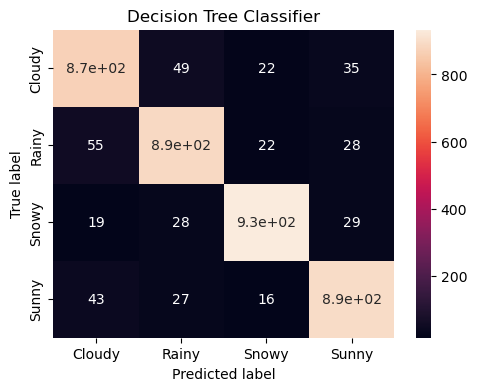

In [12]:
#Data Classification
#Membangun model klasifikasi dengan Decision Tree
WeatherTree = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None,
    min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0,
    max_features=None, random_state=None, max_leaf_nodes=None,
    min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0,
    monotonic_cst=None)

#Melatih model dengan data latih
WeatherTree.fit(X_trainset,y_trainset)

#Memprediksi data uji dengan model
y_predWeather = WeatherTree.predict(X_testset)

#Menghitung nilai akurasi prediksi model
from sklearn import metrics
print("DecisionTrees's Metrics: \n", metrics.classification_report(y_testset, y_predWeather, digits=4))

#Membuat Confusion Matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score

confusionMatrix = metrics.confusion_matrix(y_testset, y_predWeather)

#Mengubah ke bentuk dataframe untuk memudahkan plotting
dfconfusionMatrix = pd.DataFrame(confusionMatrix,
index = ['Cloudy','Rainy','Snowy','Sunny' ],
columns = ['Cloudy','Rainy','Snowy','Sunny' ])

#Membuat tampilan plot
plt.figure(figsize=(5.5,4))
sns.heatmap(dfconfusionMatrix, annot=True)
plt.title('Decision Tree Classifier')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

K-Nearest Neighbors Metrics: 
               precision    recall  f1-score   support

      Cloudy     0.8440    0.8924    0.8675       976
       Rainy     0.8747    0.8704    0.8725       995
       Snowy     0.9191    0.9118    0.9154      1009
       Sunny     0.9264    0.8857    0.9056       980

    accuracy                         0.8902      3960
   macro avg     0.8910    0.8901    0.8903      3960
weighted avg     0.8912    0.8902    0.8904      3960



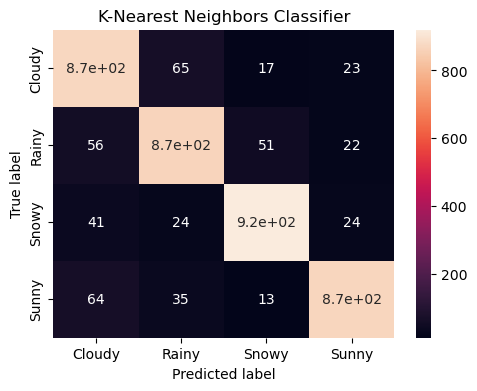

In [13]:
#Data Classification
#Membangun model klasifikasi dengan K-Nearest Neighbors
WeatherTree = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto',
leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None)

WeatherTree.fit(X_trainset,y_trainset)

#Memprediksi data uji dengan model
y_predWeather = WeatherTree.predict(X_testset)

#Menghitung nilai akurasi prediksi model
from sklearn import metrics
print("K-Nearest Neighbors Metrics: \n", metrics.classification_report(y_testset, y_predWeather, digits=4))

#Membuat Confusion Matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score

confusionMatrix = metrics.confusion_matrix(y_testset, y_predWeather)

#Mengubah ke bentuk dataframe untuk memudahkan plotting
dfconfusionMatrix = pd.DataFrame(confusionMatrix,
index = ['Cloudy', 'Rainy', 'Snowy' , 'Sunny' ],
columns = ['Cloudy','Rainy', 'Snowy', 'Sunny' ])

#Membuat tampilan plot
plt.figure(figsize=(5.5,4))
sns.heatmap(dfconfusionMatrix, annot=True)
plt.title('K-Nearest Neighbors Classifier')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

#Melatih model dengan data latih

Gaussian Naïve Bayes Metrics: 
               precision    recall  f1-score   support

      Cloudy     0.8534    0.8115    0.8319       976
       Rainy     0.8434    0.8392    0.8413       995
       Snowy     0.9303    0.9128    0.9215      1009
       Sunny     0.8203    0.8806    0.8494       980

    accuracy                         0.8614      3960
   macro avg     0.8619    0.8610    0.8610      3960
weighted avg     0.8623    0.8614    0.8614      3960



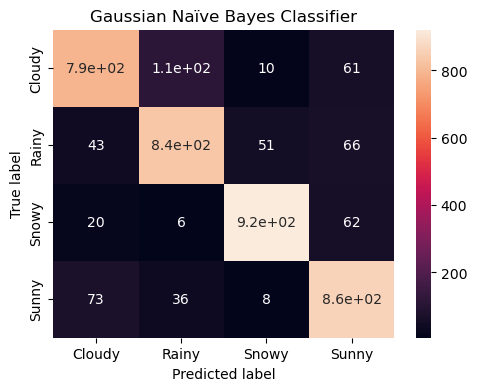

In [15]:
#Data Classification
#Membangun model klasifikasi dengan Gaussian Naive Bayes
WeatherTree = GaussianNB(priors=None, var_smoothing=1e-09)

#Melatih model dengan data latih
WeatherTree.fit(X_trainset,y_trainset)

#Memprediksi data uji dengan model
y_predWeather = WeatherTree.predict(X_testset)

#Menghitung nilai akurasi prediksi model
from sklearn import metrics
print("Gaussian Naïve Bayes Metrics: \n", metrics.classification_report(y_testset, y_predWeather, digits=4))

#Membuat Confusion Matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score

confusionMatrix = metrics.confusion_matrix(y_testset, y_predWeather)

#Mengubah ke bentuk dataframe untuk memudahkan plotting
dfconfusionMatrix = pd.DataFrame(confusionMatrix,
index = ['Cloudy','Rainy','Snowy','Sunny' ],
columns = ['Cloudy','Rainy','Snowy', 'Sunny' ])

#Membuat tampilan plot
plt.figure(figsize=(5.5,4))
sns.heatmap(dfconfusionMatrix, annot=True)
plt.title('Gaussian Naïve Bayes Classifier')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

MLP Classifier Metrics: 
               precision    recall  f1-score   support

      Cloudy     0.8398    0.9129    0.8748       976
       Rainy     0.9144    0.9015    0.9079       995
       Snowy     0.9384    0.9217    0.9300      1009
       Sunny     0.9385    0.8878    0.9124       980

    accuracy                         0.9061      3960
   macro avg     0.9078    0.9060    0.9063      3960
weighted avg     0.9081    0.9061    0.9065      3960



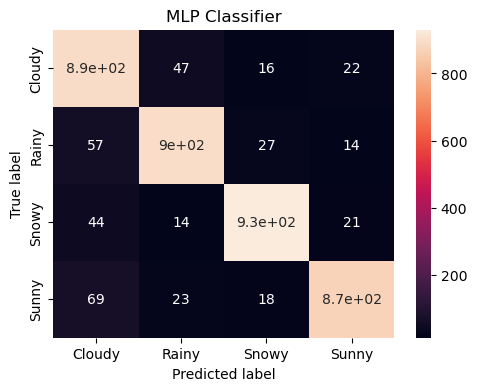

In [16]:
#Data Classification
#Membangun model klasifikasi dengan MLP Classifier
WeatherTree = MLPClassifier(hidden_layer_sizes=(100,), activation='relu',
    solver='adam', alpha=0.0001, batch_size='auto',
    learning_rate='constant', learning_rate_init=0.001,
    power_t=0.5, max_iter=1000, shuffle=True, random_state=None,
    tol=0.0001, verbose=False, warm_start=False, momentum=0.9,
    nesterovs_momentum=True, early_stopping=False,
    validation_fraction=0.1, beta_1=0.9, beta_2=0.999,
    epsilon=1e-08, n_iter_no_change=10, max_fun=15000)

#Melatih model dengan data latih
WeatherTree.fit(X_trainset,y_trainset)

#Memprediksi data uji dengan model
y_predWeather = WeatherTree.predict(X_testset)

#Menghitung nilai akurasi prediksi model
from sklearn import metrics
print("MLP Classifier Metrics: \n", metrics.classification_report(y_testset, y_predWeather, digits=4))
#Membuat Confusion Matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score

confusionMatrix = metrics.confusion_matrix(y_testset, y_predWeather)

#Mengubah ke bentuk dataframe untuk memudahkan plotting
dfconfusionMatrix = pd.DataFrame(confusionMatrix,
index = ['Cloudy','Rainy','Snowy','Sunny' ],
columns = ['Cloudy','Rainy','Snowy','Sunny' ])

#Membuat tampilan plot
plt.figure(figsize=(5.5,4))
sns.heatmap(dfconfusionMatrix, annot=True)
plt.title('MLP Classifier')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

Support Vector Classification Metrics: 
               precision    recall  f1-score   support

      Cloudy     0.8623    0.9047    0.8830       976
       Rainy     0.9048    0.8975    0.9011       995
       Snowy     0.9440    0.9197    0.9317      1009
       Sunny     0.9099    0.8969    0.9034       980

    accuracy                         0.9048      3960
   macro avg     0.9053    0.9047    0.9048      3960
weighted avg     0.9056    0.9048    0.9050      3960



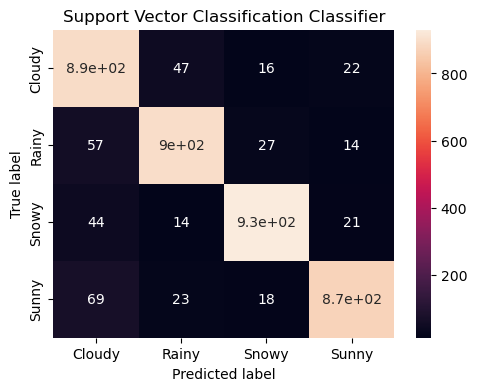

In [18]:
#Data Classification
#Membangun model klasifikasi dengan Support Vector Classification
WeatherTree = SVC(C=1.0, kernel='rbf', degree=3, gamma='scale',
    coef0=0.0, shrinking=True, probability=False,
    tol=0.001, cache_size=200, class_weight=None,
    verbose=False, max_iter =- 1, decision_function_shape='ovr',
    break_ties=False, random_state=None)
#Melatih model dengan data latih
WeatherTree.fit(X_trainset,y_trainset)

#Memprediksi data uji dengan model
y_predWeather = WeatherTree.predict(X_testset)

#Menghitung nilai akurasi prediksi model
from sklearn import metrics
print("Support Vector Classification Metrics: \n", metrics.classification_report(y_testset, y_predWeather, digits=4))

#Membuat Confusion Matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score

confusionMatrix - metrics.confusion_matrix(y_testset, y_predWeather)

#Mengubah ke bentuk dataframe untuk memudahkan plotting
dfconfusionMatrix = pd.DataFrame(confusionMatrix,
index = ['Cloudy','Rainy','Snowy','Sunny' ],
columns = ['Cloudy','Rainy','Snowy', 'Sunny' ])

#Membuat tampilan plot
plt.figure(figsize=(5.5,4))
sns.heatmap(dfconfusionMatrix, annot=True)
plt.title('Support Vector Classification Classifier')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt. show()